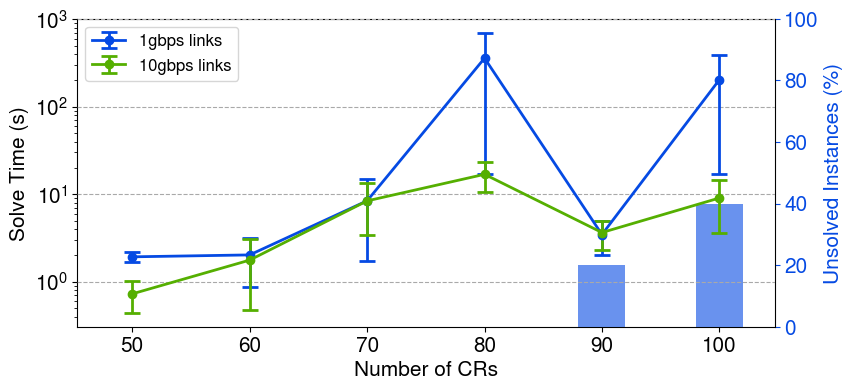

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

means_1 = []
error_1 = []
means_10 = []
error_10 = []
indexes = []

pathFile_10 = "solutions/time_eval_1.csv"
dataSol_10 = pd.read_csv(pathFile_10, sep=",")
dfSol_10 = pd.DataFrame(dataSol_10)

pathFile_1 = "solutions/time_eval_2.csv"
dataSol_1 = pd.read_csv(pathFile_1, sep=",")
dfSol_1 = pd.DataFrame(dataSol_1)

unsolved = [0 for i in range(0, dfSol_1.toposize.nunique())]

for row in dfSol_1.iterrows():
    if row[1]["solveTime"] >= 1800.0:
        index = int((row[1]["toposize"] - 50) / 10)
        unsolved[index] += 1

unsolved_norm = [i / 5 for i in unsolved]

for toposize in dfSol_10.toposize.unique():
    mean = dfSol_1.loc[(dfSol_1["toposize"] == toposize) & (dfSol_1['solveTime'] < 1800), 'solveTime'].mean()
    count = dfSol_1.loc[(dfSol_1["toposize"] == toposize) & (dfSol_1['solveTime'] < 1800), 'solveTime'].count()
    std = dfSol_1.loc[(dfSol_1["toposize"] == toposize) & (dfSol_1['solveTime'] < 1800), 'solveTime'].std()
    error = std / np.sqrt(count)

    means_1.append(mean)
    error_1.append(error)

    mean = dfSol_10.loc[(dfSol_10["toposize"] == toposize) & (dfSol_10['solveTime'] < 1800), 'solveTime'].mean()
    count = dfSol_10.loc[(dfSol_10["toposize"] == toposize) & (dfSol_10['solveTime'] < 1800), 'solveTime'].count()
    std = dfSol_10.loc[(dfSol_10["toposize"] == toposize) & (dfSol_10['solveTime'] < 1800), 'solveTime'].std()
    error = std / np.sqrt(count)

    means_10.append(mean)
    error_10.append(error)

fig, ax1 = plt.subplots(figsize=(9, 4))

color1 = '#643299'
color2 = '#054AE3'
color3 = '#C84929'
color4 = '#DFAD23'
color5 = '#55AF01'
alpha = 0.6

ax1.errorbar(range(len(means_1)), means_1, error_1, color=color2, marker='o', 
             label='1gbps links', capsize=6, lw=2, capthick=2, zorder=5)
ax1.errorbar(range(len(means_10)), means_10, error_10, color=color5, marker='o', 
             label='10gbps links', capsize=6, lw=2, capthick=2, zorder=5)

ax1.set_xticks(range(len(means_1)), dfSol_10.toposize.unique())
ax1.set_xlabel("Number of CRs", fontsize=15)
ax1.set_yscale('log')
ax1.set_ylabel("Solve Time (s)", fontsize=15)
ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.tick_params(axis='x', which='major', labelsize=15)
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=-1)
ax1.legend(loc='best', fontsize=12)

ax2 = ax1.twinx()

ax2.bar(range(len(unsolved_norm)), [i * 100 for i in unsolved_norm], width=0.4, color=color2, alpha=alpha, zorder=3)

ax2.set_ylabel('Unsolved Instances (%)', color=color2, fontsize=15)
ax2.set_ylim(0,100)
ax2.tick_params(axis='y', which='major', colors=color2, labelsize=15)

ax1.set_zorder(ax2.get_zorder()+1)
ax1.set_frame_on(False)
# fig.suptitle('Solving Time by Number of Virtual Positions')
# plt.show()
plt.savefig('fig/solve_time_1_10.pdf', bbox_inches='tight')


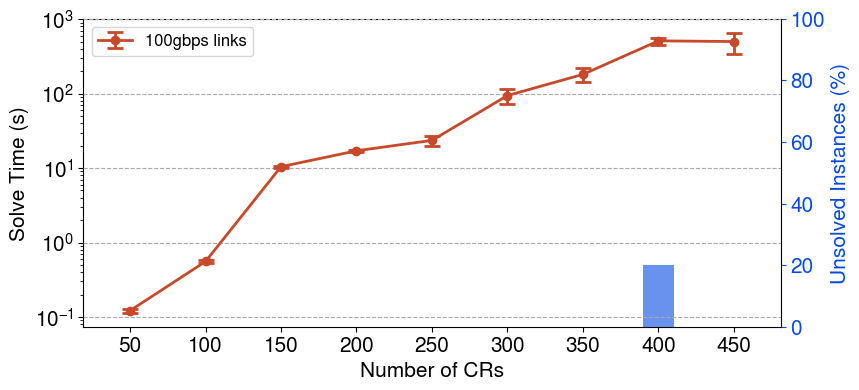

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

plt.rc('font', family='Nimbus Sans') 
plt.rc('axes', axisbelow=True)

means_100 = []
error_100 = []

pathFile_100 = "solutions/time_eval_0.csv"
dataSol_100 = pd.read_csv(pathFile_100, sep=",")
dfSol_100 = pd.DataFrame(dataSol_100)

unsolved = [0 for i in range(0, dfSol_100.toposize.nunique())]

for row in dfSol_100.iterrows():
    if row[1]["solveTime"] >= 1800.0:
        index = int((row[1]["toposize"] - 50) / 50)
        unsolved[index] += 1

unsolved_norm = [i / 5 for i in unsolved]

for toposize in dfSol_100.toposize.unique():
    mean = dfSol_100.loc[(dfSol_100["toposize"] == toposize) & (dfSol_100['solveTime'] < 1800), 'solveTime'].mean()
    count = dfSol_100.loc[(dfSol_100["toposize"] == toposize) & (dfSol_100['solveTime'] < 1800), 'solveTime'].count()
    std = dfSol_100.loc[(dfSol_100["toposize"] == toposize) & (dfSol_100['solveTime'] < 1800), 'solveTime'].std()
    error = std / np.sqrt(count)

    means_100.append(mean)
    error_100.append(error)

fig, ax1 = plt.subplots(figsize=(9, 4))

color1 = '#643299'
color2 = '#054AE3'
color3 = '#C84929'
color4 = '#DFAD23'
color5 = '#55AF01'
alpha = 0.6

ax1.errorbar(range(len(means_100)), means_100, error_100, color=color3, marker='o', 
             label='100gbps links', capsize=6, lw=2, capthick=2, zorder=5)

ax1.set_xticks(range(len(means_100)), dfSol_100.toposize.unique())
ax1.set_xlabel("Number of CRs", fontsize=15)
ax1.set_yscale('log')
ax1.set_ylabel("Solve Time (s)", fontsize=15)
ax1.tick_params(axis='y', which='major', labelsize=15)
ax1.tick_params(axis='x', which='major', labelsize=15)
ax1.grid(True, 'major', 'y', linestyle='--', color='darkgrey', zorder=-1)
ax1.legend(loc='best', fontsize=12)

ax2 = ax1.twinx()

ax2.bar(range(len(unsolved_norm)), [i * 100 for i in unsolved_norm], width=0.4, color=color2, alpha=alpha, zorder=3)

ax2.set_ylabel('Unsolved Instances (%)', color=color2, fontsize=15)
ax2.set_ylim(0,100)
ax2.tick_params(axis='y', which='major', colors=color2, labelsize=15)

ax1.set_zorder(ax2.get_zorder()+1)
ax1.set_frame_on(False)
# fig.suptitle('Solving Time by Number of Virtual Positions')
# plt.show()
plt.savefig('fig/solve_time_100.pdf', bbox_inches='tight')


EEPRAN: 2555852.156886712
CRAN: 2616775.7463833685
DRAN: 5522943.303212189
Delta CRAN: 0.8048436354048617
Delta DRAN: 0.4627699428672765


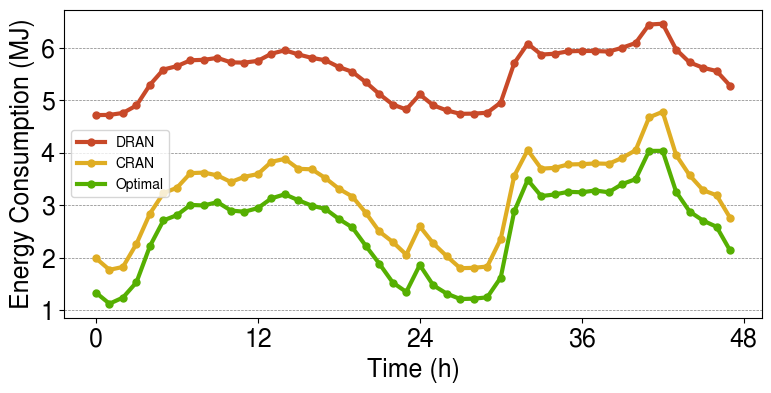

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

plt.rc('font', family='Nimbus Sans') 
plt.rc('axes', axisbelow=True)

pathFile_eepran = "solutions/energy_eepran.csv"
dataSol_eepran = pd.read_csv(pathFile_eepran, sep=",")
dfSol_eepran = pd.DataFrame(dataSol_eepran)

pathFile_cran = "solutions/energy_cran.csv"
dataSol_cran = pd.read_csv(pathFile_cran, sep=",")
dfSol_cran = pd.DataFrame(dataSol_cran)

pathFile_cran_cent = "solutions/energy_cran_cent.csv"
dataSol_cran_cent = pd.read_csv(pathFile_cran_cent, sep=",")
dfSol_cran_cent = pd.DataFrame(dataSol_cran_cent)

pathFile_dran = "solutions/energy_dran.csv"
dataSol_dran = pd.read_csv(pathFile_dran, sep=",")
dfSol_dran = pd.DataFrame(dataSol_dran)

dfSol_eepran['energy'] = dfSol_eepran['ranEnergy'] + dfSol_eepran['migEnergy'] + dfSol_eepran['netEnergy']
dfSol_cran['energy'] = dfSol_cran['ranEnergy'] + dfSol_cran['migEnergy'] + dfSol_cran['netEnergy']
dfSol_cran_cent['energy'] = dfSol_cran_cent['ranEnergy'] + dfSol_cran_cent['migEnergy'] + dfSol_cran_cent['netEnergy']
dfSol_dran['energy'] = dfSol_dran['ranEnergy'] + dfSol_dran['migEnergy'] + dfSol_dran['netEnergy']

print(f"EEPRAN: {dfSol_eepran['energy'].mean()}")
print(f"CRAN: {dfSol_cran['energy'].mean()}")
print(f"DRAN: {dfSol_dran['energy'].mean()}")
print(f"Delta CRAN: {dfSol_eepran['energy'].mean() / dfSol_cran_cent['energy'].mean()}")
print(f"Delta DRAN: {dfSol_eepran['energy'].mean() / dfSol_dran['energy'].mean()}")

fig, ax1 = plt.subplots(figsize=(9, 4))

color1 = '#643299'
color2 = '#054AE3'
color3 = '#C84929'
color4 = '#DFAD23'
color5 = '#55AF01'

alpha = 0.7
ax1.set_ylabel('Energy Consumption (MJ)', fontsize=18)
ax1.set_xlabel('Time (h)', fontsize=18)
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.tick_params(axis='y', which='major', labelsize=18)
ax1.tick_params(axis='x', which='major', labelsize=18)

# ax1.plot(dfSol_cran['timestamp'][:48], dfSol_cran['energy'][:48]/1e6, color=color4, lw=3, marker='o', ms=5, label='CRAN')
ax1.plot(dfSol_dran['timestamp'][:48], dfSol_dran['energy'][:48]/1e6, color=color3, lw=3, marker='o', ms=5, label='DRAN')
ax1.plot(dfSol_cran_cent['timestamp'][:48], dfSol_cran_cent['energy'][:48]/1e6, color=color4, lw=3, marker='o', ms=5, label='CRAN')
ax1.plot(dfSol_eepran['timestamp'][:48], dfSol_eepran['energy'][:48]/1e6, color=color5, lw=3, marker='o', ms=5, label='Optimal')

plt.xticks(range(0, 50, 12))
plt.legend(loc='center left')

# plt.show()
# plt.title("Centralização por Tipo de Serviço")
plt.savefig('fig/energy_comparison.pdf', bbox_inches='tight')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

plt.rc('font', family='Nimbus Sans') 
plt.rc('axes', axisbelow=True)

pathFile_eepran = "solutions/energy_eepran.csv"
dataSol_eepran = pd.read_csv(pathFile_eepran, sep=",")
dfSol_eepran = pd.DataFrame(dataSol_eepran)

pathFile_cran = "solutions/energy_cran.csv"
dataSol_cran = pd.read_csv(pathFile_cran, sep=",")
dfSol_cran = pd.DataFrame(dataSol_cran)

pathFile_cran_cent = "solutions/energy_cran_cent.csv"
dataSol_cran_cent = pd.read_csv(pathFile_cran_cent, sep=",")
dfSol_cran_cent = pd.DataFrame(dataSol_cran_cent)

pathFile_dran = "solutions/energy_dran.csv"
dataSol_dran = pd.read_csv(pathFile_dran, sep=",")
dfSol_dran = pd.DataFrame(dataSol_dran)

energy_components = ['vRAN', 'TNet', 'Mig']
topologies = {
    'eepran': np.array([dfSol_eepran['ranEnergy'].mean(), dfSol_eepran['netEnergy'].mean(), dfSol_eepran['migEnergy'].mean()]),
    'cran': np.array([dfSol_cran_cent['ranEnergy'].mean(), dfSol_cran_cent['netEnergy'].mean(), dfSol_cran_cent['migEnergy'].mean()]),
    'dran': np.array([dfSol_dran['ranEnergy'].mean(), dfSol_dran['netEnergy'].mean(), dfSol_dran['migEnergy'].mean()]),
}

fig, ax1 = plt.subplots(figsize=(9, 4))

color1 = '#643299'
color2 = '#054AE3'
color3 = '#C84929'
color4 = '#DFAD23'
color5 = '#55AF01'

alpha = 0.7
ax1.set_ylabel('Energy Consumption (MJ)', fontsize=18)
ax1.set_xlabel('Time (h)', fontsize=18)
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

ax1.tick_params(axis='y', which='major', labelsize=18)
ax1.tick_params(axis='x', which='major', labelsize=18)

# ax1.plot(dfSol_cran['timestamp'][:48], dfSol_cran['energy'][:48]/1e6, color=color4, lw=3, marker='o', ms=5, label='CRAN')
ax1.plot(dfSol_dran['timestamp'][:48], dfSol_dran['energy'][:48]/1e6, color=color3, lw=3, marker='o', ms=5, label='DRAN')
ax1.plot(dfSol_cran_cent['timestamp'][:48], dfSol_cran_cent['energy'][:48]/1e6, color=color4, lw=3, marker='o', ms=5, label='CRAN')
ax1.plot(dfSol_eepran['timestamp'][:48], dfSol_eepran['energy'][:48]/1e6, color=color5, lw=3, marker='o', ms=5, label='Optimal')

plt.xticks(range(0, 50, 12))
plt.legend(loc='center left')

# plt.show()
# plt.title("Centralização por Tipo de Serviço")
plt.savefig('fig/energy_comparison.pdf', bbox_inches='tight')
